With the dataset https://gist.github.com/keeganhines/59974f1ebef97bbaa44fb19143f90bad
Hitter.csv

In [1]:
# import necessary packages
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
from matplotlib import pyplot as plt

In [7]:
hitter = pd.read_csv("Hitters.csv")

In [8]:
Hitters.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


## Problem 1
Use LASSO regression to predict Salary from the other numeric predictors.
Create a visualization of the coefficient trajectories. Comment on which are the
final three predictors that remain in the model. Use cross-validation to find the
optimal value of the regularization penality. How many predictors are left in
that model

In [28]:
### drop those categorical columns to predict their salary
hitter = pd.read_csv("Hitters.csv")
Hitter_1 = hitter.drop(['Unnamed: 0','League','Division','NewLeague'],axis = 1).dropna()

In [29]:
Hitter_1.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


In [32]:
X = Hitter_1.iloc[:,:-1]
y = Hitter_1["Salary"].values

In [33]:
X

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,9,3
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,381,20
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,113,7
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12


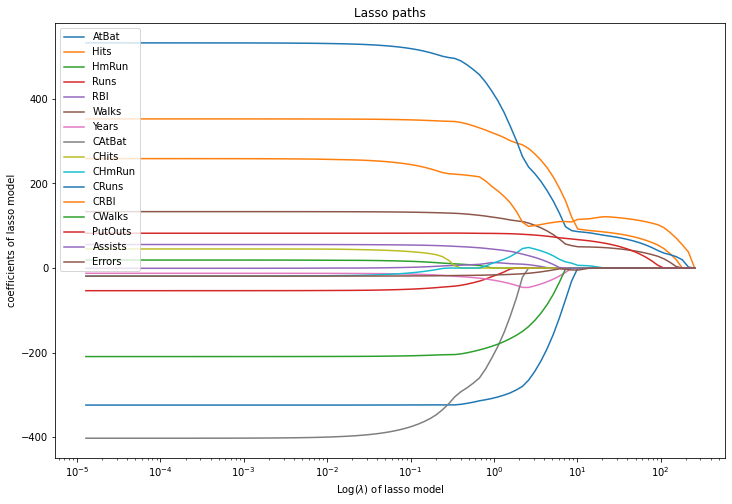

In [44]:
### Set-up scaled X and Y
m,n = X.shape
X_scaled = preprocessing.scale(X)
y_scaled = preprocessing.scale(y)
eps = 5e-8

### Apply LASSO
alphas_lasso, coefs_lasso, _ = linear_model.lasso_path(X_scaled, y, eps, fit_intercept=False)
plt.figure(figsize = (12,8))
#neg_log_alphas_lasso = -np.log10(alphas_lasso)

for i in range(n):
    plt.plot(alphas_lasso, coefs_lasso[i], label = Hitter_1.columns[i])

plt.xscale('log')
plt.xlabel('Log($\\lambda$) of lasso model')
plt.ylabel('coefficients of lasso model')
plt.title('Lasso paths')
plt.axis('tight')
plt.legend()


In [41]:
lasso_cv.coef_

array([-2.08295369,  7.04101066,  0.        , -0.68261512,  0.49655158,
        5.51178063, -6.10762506, -0.08706575,  0.        ,  0.15646752,
        1.22806115,  0.58382084, -0.69060051,  0.29269419,  0.30437223,
       -2.4507947 ])

From the Diagram, the last three variables hit the axis are CRBI AtBat(or CRuns) and Hits

In [42]:
### Use cross validation to confirm result
CV_1 = linear_model.LassoCV(cv = 10, max_iter = 1000, normalize = True)
lasso_cv = CV_1.fit(X, y)

print('The penalization of the LASSO model')
print(lasso_cv.alpha_)
print('This is small enough. From the list we can also find out that the HmRun and CHits are excluded from the model')



The penalization of the LASSO model
0.0635481759985745
This is small enough. From the list we can also find out that the HmRun and CHits are excluded from the model


## Problem 2
Ridge Regression.

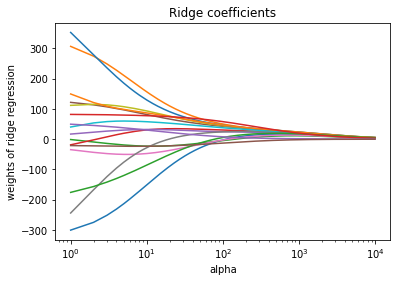

In [45]:
# Compute paths

hitter = pd.read_csv("Hitters.csv")
Hitter_2 = hitter.drop(['Unnamed: 0','League','Division','NewLeague'],axis = 1).dropna()

### Set-up scaled X and Y
X = Hitter_2.iloc[:,:-1]
y = Hitter_2["Salary"].values
X_scaled = preprocessing.scale(X)
y_scaled = preprocessing.scale(y)
m,n = X.shape
n_alphas = 300
alphas = np.arange(1,10000,1)

coefficients = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    r = ridge.fit(X_scaled, y)
    coefficients.append(r.coef_)

# Results Visualization

ax = plt.gca()
ax.plot(alphas, coefficients)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights of ridge regression')
plt.title('Ridge coefficients')
plt.axis('tight')
plt.show()

In [48]:
#Cross Validation
alphas = 10**np.linspace(10,-10,100)*0.5
cv_2 = linear_model.RidgeCV(alphas=alphas,).fit(X_scaled, y)
print('The optimal vaule of the regularization penalty ')
print(cv_2.alpha_)

The optimal vaule of the regularization penalty 
2.5470690074081928


## Problem 3

Low bias comes with high variance and the high bias comes with low variance.

The regularization makes sure that the model will achieve the balance between variance and bias.

In problem 1, with higher penalization to the coefficients, the models will have lower variance and higher bias.